
# **BOOTCAMP on Deep Learning and Computer Vision**
# **@Siliguri Institute of Technology, India**
# Week-5 | Date: Nov 03, 2023

## **# Convolutional Neural Networks (CNNs): Part-1**



### Welcome to the 5th Lab of 42028: Deep Learning and CNN!

In this  Lab/Tutorial session you will be implementing Convolutional Neural Network for Fashion MNIST dataset classification .

So lets get started!

## Tutorial:
Implementation of a sample CNN architecture using Keras for classfication of Fashion MNIST dataset.

## Tasks for this week:

1. Implementation of a CNN for Dogs and Cats classification using Keras API.
2. Train and test model


### Step 1: Import required packages

we will need tensorflow, numpy, os and keras


In [1]:
import tensorflow as tf
import os
import numpy as np
import math, numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt
import h5py
import glob
import cv2
import keras.utils as image


### Step 2: Download the Fashion Mnist dataset using keras

In [2]:
fashionMnist=tf.keras.datasets.fashion_mnist

In [3]:
# Load data from fashion mnist dataset using the load_data() method.
(train_images, train_labels), (test_images, test_labels) = fashionMnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Display the shapes of the training images
print(train_images.shape)
print(train_images.dtype)

(60000, 28, 28)
uint8


In [5]:
#define the class names for the fashion mnist dataset
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

3


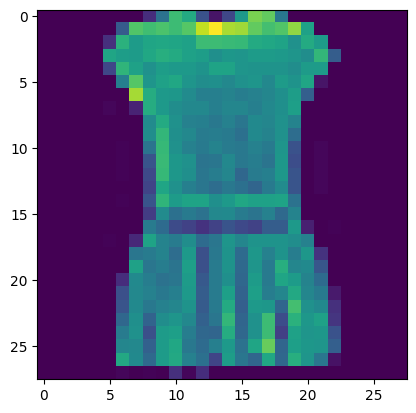

In [6]:
## Display an image from the dataset
import matplotlib.pyplot as plt
plt.imshow(train_images[3])
print(train_labels[3])

** Note :** Scikit-learn import the Fashion MNIST dataset as a 1-D array while Keras API load the dataset in 28X28 format.

### Step 3: Normalize the dataset and split a small part of the training set into validation set


- Validation set: first 5000 samples (total 5000 samples)
- Training set: 5000 to remaining (total 55000 samples)

In [7]:
## WRITE YOUR CODE HERE ## (~ 5 line of code)
## Hint: Using slicing to split the training to train and validation

train_images=train_images.reshape(60000, 28, 28, 1)
valid_images= train_images[:5000] / 255.0
valid_labels = train_labels[:5000]

train_images  = train_images[5000:] / 255.0
train_labels=train_labels[5000:]

test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0

### END YOUR CODE HERE ###

In [8]:
# Print the shapes for Train, Validation, and Test dataset.
print(np.shape(train_images))
print(np.shape(valid_images))
print(np.shape(test_images))

(55000, 28, 28, 1)
(5000, 28, 28, 1)
(10000, 28, 28, 1)


[**Expected** Output]

(55000, 28, 28)
(5000, 28, 28)
(10000, 28, 28)

### Step 4:  Design the CNN Architecture

Design the following CNN architecture:

<img src='http://drive.google.com/uc?export=view&id=1af-9cnzOpZzNf_02zdJB06zanaU3LrY2' alt='Conv'>


Input: $28 X 28 X 1$ image

Activation function in CONV layer: Relu

Kernel Size: 3 X 3

Activation function in Output layer : softmax, 10 classes

**Hint:** Use Conv2D(), MaxPooling2D(), Flatten(), and Dense()



In [9]:
model = tf.keras.models.Sequential([
  # Create CONV layers
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  # Flatten layer
  tf.keras.layers.Flatten(),

  # Add Fully connected layer /Dense layer
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

## **Notes:**
* **Sequential model.** This is the simplest kind of Keras model, for neural networks which defines a SEQUENCE of layers.

* **Flatten.** Flatten just takes that image and turns it into a 1-dimensional vector.

* Next we add a second Dense hidden layer with 128 neurons, also using the ReLU activation function.  **Dense.** Add a layer to the neural network which is followed by activation function of ReLU. The ReLU only passes the value greater than 0 and for all other values of X it passes 0.
e.g. If X>0 return X, else return 0"

* Finally, we add a Dense output layer with 10 neurons (one per class), using the softmax activation function.

* **Softmax** The softmax takes a set of values and select the biggest one from the set of values.

### Visualize the CNN Architecture

1. Using plot_model from keras.utils

**Requires**: pydot, pydotplus, graphviz (Available on Google Colab already, installation not required)

*   pip install pydot
*   pip install pydotplus
* pip install graphviz

**Reference:** https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model


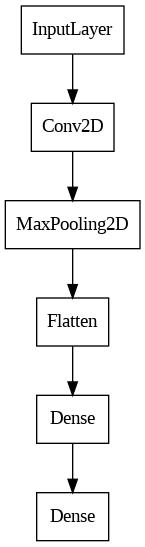

In [13]:
# Using Plot_Model from Keras.Utils
model_img_file = 'Simple-CNN.png'
tf.keras.utils.plot_model(model, to_file=model_img_file,
                          show_shapes=False,
                          show_layer_activations=False,
                          rankdir='TB', # Options: TB, LR
                          show_dtype=False,
                          show_layer_names=False )

# Also Try:
# show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True

## Step 5: Training the model

**"sparse_categorical_crossentropy": **   The dataset contains sparse labels and the classes are exclusive.

** One-hot vector encoding** This is sometime used for encoding the labels if there one target  probability per class for each instance. For example.
[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.] represent one-hot encoding for class 4. In such case, **"categorical_crossentropy"** loss is used.

** "sigmoid_crossentropy"** This loss is used for binary class classification problems and also **"sigmoid"** activation function is used instead of Softmax.



In [14]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

###**Understanding on Number of Traninable Parameters:**

1. **CONV Layer 1:** 3X3 (Filter) X 64 (number of filters) + 64 (Bias term X number of filters) = **640**

2. **POOL Layer parameter** = 0, no training parameters in POOL layer
3. **Flatten layer parameter** = 0, no traning parameters in Flatten layer
4. **Dense Layer 1: **128 X 10816 (from flatten layer) + 128 (bias term) = **1384576**
5. **Dense Layer 2:** 128 (From dense layer 1) X 10 + 10 (Bias term) = **1290**

6. **Total Trainable parameters:** 640 + 1384576 + 1290 = **1386506**

In [15]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1719/1719 [==============================] - 17s 4ms/step - loss: 0.3886 - accuracy: 0.8623
Epoch 2/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2638 - accuracy: 0.9039
Epoch 3/5
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2178 - accuracy: 0.9202
Epoch 4/5
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1821 - accuracy: 0.9312
Epoch 5/5
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1541 - accuracy: 0.9423


In [16]:
# Process the test images and find the accuracy
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2555 - accuracy: 0.9131


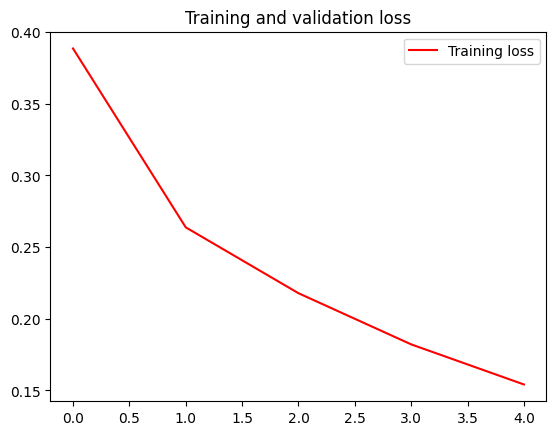

In [17]:
loss = history.history['loss']
#val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
#plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



## Step 6: Evaluation on test dataset

In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.2772 - accuracy: 0.8999


[0.27723848819732666, 0.8999000191688538]

## Task: Image classification using Cats and Dogs Dataset.

###  Step: 1 Mount the Google Drive to access the Cats and Dogs Dataset
Reference: https://github.com/ardamavi/Dog-Cat-Classifier



In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [16]:
cd /content/gdrive/MyDrive/SIT-DL-CV-Bootcamp-2023/Week5

/content/gdrive/MyDrive/SIT-DL-CV-Bootcamp-2023/Week5


In [17]:
!unzip Cats-Dogs-dataset-64.zip
!ls

Archive:  Cats-Dogs-dataset-64.zip
   creating: TestData/cat/
  inflating: TestData/cat/cat.282.jpg  
  inflating: TestData/cat/cat.283.jpg  
  inflating: TestData/cat/cat.284.jpg  
  inflating: TestData/cat/cat.285.jpg  
  inflating: TestData/cat/cat.286.jpg  
  inflating: TestData/cat/cat.288.jpg  
  inflating: TestData/cat/cat.289.jpg  
  inflating: TestData/cat/cat.290.jpg  
  inflating: TestData/cat/cat.291.jpg  
  inflating: TestData/cat/cat.292.jpg  
  inflating: TestData/cat/cat.293.jpg  
  inflating: TestData/cat/cat.294.jpg  
  inflating: TestData/cat/cat.296.jpg  
  inflating: TestData/cat/cat.298.jpg  
  inflating: TestData/cat/cat.299.jpg  
  inflating: TestData/cat/cat.300.jpg  
  inflating: TestData/cat/cat.301.jpg  
  inflating: TestData/cat/cat.302.jpg  
  inflating: TestData/cat/cat.303.jpg  
  inflating: TestData/cat/cat.305.jpg  
  inflating: TestData/cat/cat.306.jpg  
  inflating: TestData/cat/cat.307.jpg  
  inflating: TestData/cat/cat.308.jpg  
  inflating: TestD

### Step : 2 Image Generators: (Preparing the dataset for train, validation and testing)

In Keras  **keras.preprocessing.image.ImageDataGenerator** class  can be used to read images and extract labels from them via .flow_from_directory. The image generator can also be used for data augmentation. The image generators can used easily with Keras model that accept data generators as inputs. such as fit_generator, evaluate_generator, and predict_generator.


In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)


# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/SIT-DL-CV-Bootcamp-2023/Week5',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64X64
        batch_size=30,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 32 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/gdrive/MyDrive/SIT-DL-CV-Bootcamp-2023/Week5',  # This is the source directory for training images
        target_size=(64, 64),  # All images will be resized to 64X64
        batch_size=30,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 600 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


### Step 3: Create the CNN model:

Create the following CNN model:

<img src='http://drive.google.com/uc?export=view&id=1A0vzhJyQnnhdwL5hQdYLmwJqyxr4f_Hj' alt='Conv'>


Input: $64 X 64 X 3$ image

Activation function in CONV layer: Relu

Kernel Size: 3X3

Activation function in Output layer : sigmoid, 2 classes

**Hint:** Use Conv2D(), MaxPooling2D(), Flatten(), and Dense()

In [19]:
## WRITE YOUR CODE HERE ## (~11 lines)
model1 = tf.keras.models.Sequential([
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),

    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('Dog') and 1 for the other ('Cat')
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

## END YOUR CODE HERE ##

In [20]:
##Print the model summary
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense_2 (Dense)             (None, 512)              

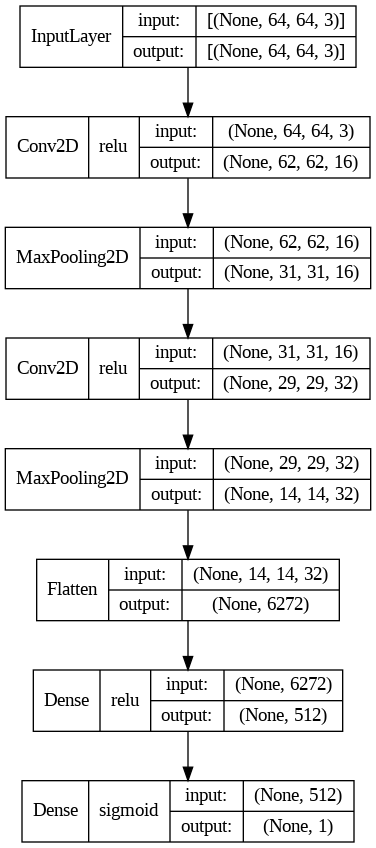

In [21]:
# Using Plot_Model from Keras.Utils
model_img_file = 'Simple-CNN2.png'
tf.keras.utils.plot_model(model1, to_file=model_img_file,
                          show_shapes=True,
                          show_layer_activations=True,
                          show_dtype=False,
                          show_layer_names=False )

# Also Try:
# show_shapes=True, show_layer_activations=True, show_dtype=True, show_layer_names=True

In [22]:
## Compile the model and add loss, optimizer and metrics
## WRITE YOUR CODE HERE ## (~1 line)
model1.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['acc'])


In [23]:
# Train/fit the model using the training and validation set.
## WRITE YOUR CODE HERE ## (~ 1 line)
history = model1.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=10,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=20)

<ipython-input-23-fba21403c5e3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(


Epoch 1/10
20/20 [==============================] - 13s 116ms/step - loss: 0.7303 - acc: 0.8033 - val_loss: 0.4583 - val_acc: 0.8333
Epoch 2/10
20/20 [==============================] - 2s 122ms/step - loss: 0.4626 - acc: 0.8333 - val_loss: 0.4695 - val_acc: 0.8333
Epoch 3/10
20/20 [==============================] - 2s 105ms/step - loss: 0.4610 - acc: 0.8333 - val_loss: 0.4469 - val_acc: 0.8333
Epoch 4/10
20/20 [==============================] - 2s 119ms/step - loss: 0.4465 - acc: 0.8333 - val_loss: 0.4368 - val_acc: 0.8333
Epoch 5/10
20/20 [==============================] - 2s 102ms/step - loss: 0.4400 - acc: 0.8333 - val_loss: 0.4215 - val_acc: 0.8333
Epoch 6/10
20/20 [==============================] - 2s 104ms/step - loss: 0.4197 - acc: 0.8333 - val_loss: 0.3890 - val_acc: 0.8333
Epoch 7/10
20/20 [==============================] - 2s 111ms/step - loss: 0.3903 - acc: 0.8333 - val_loss: 0.3563 - val_acc: 0.8333
Epoch 8/10
20/20 [==============================] - 2s 109ms/step - loss: 0

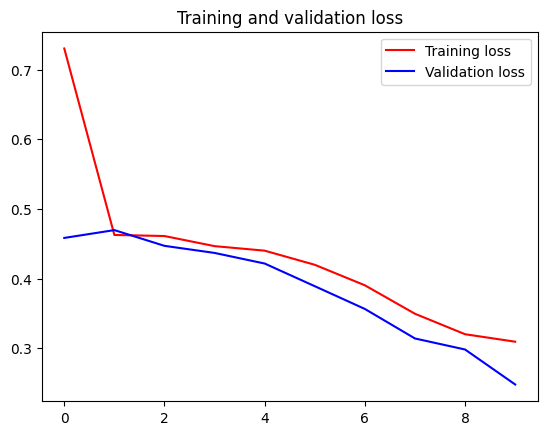

In [24]:
## Plot the Training and Validation loss
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



### Clearing all the resources

Terminate the kernel and free memory resources

In [ ]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)